# Check-GPU-Connnect

In [1]:
print("auto connect")

auto connect


In [2]:
import torch
print(torch.__version__)
print(torch.cuda.device_count()) 
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0)) 

2.4.0
2
True
Tesla T4


# Content 

## Load module from hub

In [3]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the model from TensorFlow Hub
model = hub.load('https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1') 

In [4]:
detector = model 
detector 

## Decode and format image with tf

In [5]:
def decode_and_format(img_path):
    img = tf.io.read_file(img_path)
    decode_img = tf.image.decode_jpeg(img, channels=3)
    norm_img = tf.cast(decode_img, tf.float32) / 255.0 
    reshape_img = tf.convert_to_tensor([norm_img], dtype=tf.float32)
    return reshape_img

In [6]:
decode_and_format("/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg")

<tf.Tensor: shape=(1, 480, 640, 3), dtype=float32, numpy=
array([[[[0.06666667, 0.08627451, 0.0627451 ],
         [0.06666667, 0.08627451, 0.05882353],
         [0.08235294, 0.09411765, 0.06666667],
         ...,
         [0.6       , 0.6431373 , 0.627451  ],
         [0.6039216 , 0.6392157 , 0.627451  ],
         [0.6117647 , 0.63529414, 0.627451  ]],

        [[0.07058824, 0.10980392, 0.07843138],
         [0.06666667, 0.09411765, 0.06666667],
         [0.06666667, 0.09411765, 0.0627451 ],
         ...,
         [0.6       , 0.6431373 , 0.627451  ],
         [0.6039216 , 0.6392157 , 0.627451  ],
         [0.6117647 , 0.63529414, 0.627451  ]],

        [[0.07843138, 0.12156863, 0.09803922],
         [0.05882353, 0.10196079, 0.07058824],
         [0.05490196, 0.09411765, 0.0627451 ],
         ...,
         [0.6       , 0.6431373 , 0.627451  ],
         [0.6039216 , 0.6392157 , 0.627451  ],
         [0.6039216 , 0.6392157 , 0.627451  ]],

        ...,

        [[0.05098039, 0.19215687, 

## Get output from detector-module 

In [7]:
import pandas as pd 


def get_detect_objs(img_path): 
    df_img = decode_and_format(img_path) 
    detector_output = detector.signatures['default'](df_img)

    class_names = detector_output["detection_class_entities"].numpy().tolist() 
    boxes = detector_output["detection_boxes"].numpy().tolist()
    scores = detector_output["detection_scores"].numpy().tolist()
    labels = detector_output["detection_class_labels"].numpy().tolist() 
    df = pd.DataFrame({"name": class_names, "box": boxes, "score": scores, "label": labels})
#     df = pd.DataFrame(detector_output)
    return df 

## Visualize the output

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import random 


def visualize_boxes(image_path, df):
    # Load the image
    img = tf.io.read_file(image_path)
    tf_img = tf.image.decode_jpeg(img, channels=3)
    np_img = tf_img.numpy() 
    
    # Draw boxes 
    df_filtered = df[(df['score'] > 0.5)]
    for index, row in df_filtered.iterrows():
        y1, x1, y2, x2 = row['box'] 
        x1, x2 = int(x1 * np_img.shape[1]), int(x2 * np_img.shape[1])
        y1, y2 = int(y1 * np_img.shape[0]), int(y2 * np_img.shape[0])
        color = (random.randint(50, 200), random.randint(50, 200), random.randint(50, 200))
        cv2.rectangle(np_img, (x1, y1), (x2, y2), color, 4)
        cv2.putText(np_img, str(index), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    plt.imshow(np_img)
    plt.show() 
    
    return df_filtered

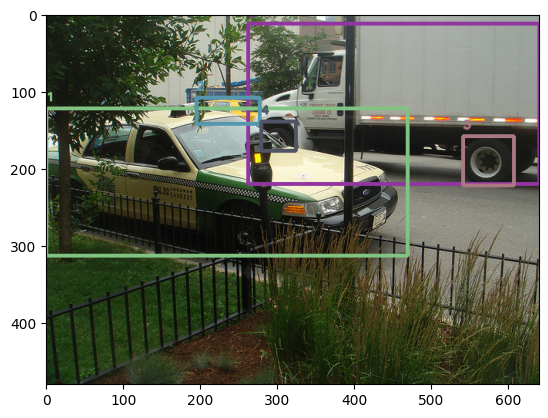

,name,box,score,label
0,b'Truck',"[0.025612691417336464, 0.4093913435935974, 0.4...",0.979451,400
1,b'Car',"[0.2548629641532898, 0.0, 0.6533462405204773, ...",0.944560,571
2,b'Car',"[0.22647440433502197, 0.305868536233902, 0.296...",0.763007,571
3,b'Wheel',"[0.32991695404052734, 0.846869945526123, 0.463...",0.724318,409
4,b'Wheel',"[0.291435569524765, 0.437492311000824, 0.36879...",0.547282,409


In [25]:
path = "/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000001.jpg"
df = get_detect_objs(path) 
visualize_boxes(path, df)

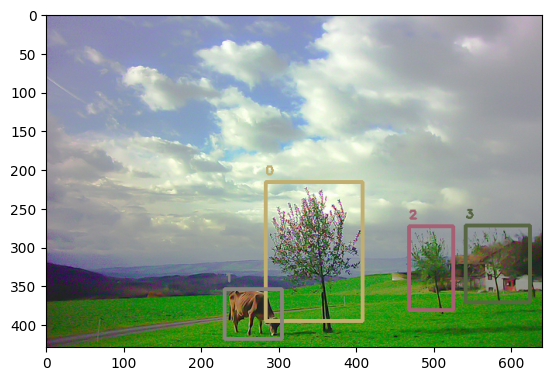

,name,box,score,label
0,b'Tree',"[0.5045608878135681, 0.4428650140762329, 0.922...",0.933037,391
1,b'Cattle',"[0.8273482918739319, 0.35971030592918396, 0.97...",0.907581,115
2,b'Tree',"[0.6366614699363708, 0.7317931652069092, 0.888...",0.862371,391
3,b'Tree',"[0.6343113780021667, 0.8466203212738037, 0.866...",0.761209,391


In [26]:
path = "/kaggle/input/coco-2017-dataset/coco2017/test2017/000000000090.jpg"
df = get_detect_objs(path) 
visualize_boxes(path, df)